# 9. Enable ALOS-2 data processing to detect extension of oil palm plantations

## 9.1. Basic of python for visualize ALOS-2 satellite images for tropical forest with oil palm plantation.
In this section, we cover the basic of using Python to visualize ALOS-2 satellite images of tropical forest with oil palm plantations. We will introduce libraries and functions for handling satellite data, creating color composites, and performing image enhancements. 

### Key learning objectives:
- 9.1.1 Understand ALOS-2 imagery.
- 9.1.2 Visualize SAR satellite images for tropical forest with oil palm plantations.

### 9.1.1. Understand ALOS-2 imagery
- Provide a brief introduction to the ALOS-2 imagery.

#### (Basic) [ALOS-2 (Advanced Land Observing Satellite-2)](https://www.eoportal.org/satellite-missions/alos-2#alos-2-advanced-land-observing-satellite-2-sar-mission--daichi-2)
Here is a brief summary of the ALOS-2 mission:
- Designed as the Advanced Land Observing Satellite-2 (ALOS-2), also known as Daichi-2, for high-resolution land observation using radar.
- Equipped with PALSAR-2, an enhanced radar sensor offering high-resolution imaging and day-and-night, all-weather observation capabilities.
- Supports disaster monitoring, environmental observation, forestry, agriculture, and infrastructure planning.
Contributes to global data for environmental studies, climate change monitoring, and land-use management.

For more details, please visit [the ALOS-2 on eoPortal](https://www.eoportal.org/satellite-missions/alos-2#eop-quick-facts-section).

#### (Basic) [Generating Large-Scale High-Quality SAR Mosaic Datasets: Application to PALSAR Data for Global Monitoring](https://www.researchgate.net/publication/224183347_Generating_Large-Scale_High-Quality_SAR_Mosaic_Datasets_Application_to_PALSAR_Data_for_Global_Monitoring)
This paper discusses methods for creating large-scale, high-quality SAR mosaic datasets using PALSAR data, which are crucial for global monitoring applications.
- Utilizes PALSAR data for enhanced environmental and land-cover monitoring.
- Addresses issues of data consistency, radiometric correction, and seamless mosaic creation.
- Provides tools for global forest monitoring, environmental change assessment, and disaster response.

- Sample two pairs for regions with such changes
  - Long term, such as 10 years or longer
  - Short-mid term, such as 1-3 years
- Change detction by calculating differences between the two years
  - we will take either of below with successful results
  - difference with a single band, eigher of HH and HV
  - difference with a PCA outputs (primaly or secondaly) of HH and HV
  - Change vector analysis beteween HH and HV
- Validate the changes for sampled locations on historical imagereis of Google Earth

### 9.1.2. Visualize SAR satellite images of tropical forests with oil palm plantations.

- Practice creating color composites with HH and HV data over several years.
- Explain interpretations using typical land cover examples.
- Highlight identifiable changes in the color composites and compare them with high-resolution images on Google Earth.

#### a. Practice color composite with HH and HV for several years.
- This hands-on exercise provides learners with the skills to read and visualize ALOS-2 imagery data using Python.
- To prepare for this practice, you will need ALOS-2 data. For analyzing deforestation due to oil palm expansion, using the annual composite image product from ALOS-2 is sufficient.
- The following steps will guide you in downloading the data from the JAXA ALOS-2 Portal for downloading [Global PALSAR-2/PALSAR/JERS-1 Mosaics and Forest/Non-Forest Maps](https://www.eorc.jaxa.jp/ALOS/en/palsar_fnf/data/index.htm).

![DownloadingALOS-2Data.png](DownloadingALOS-2Data.png)




For this hands-on exercise, we have prepared the data to save you time. What you need to do is download the data from our ownCloud server to your working directory to practice the next steps in this exercise.

In [7]:
!wget --content-disposition "https://owncloud.glodal-inc.net/owncloud/index.php/s/wETRZGKkCvWkHC0/download"

--2024-11-07 06:55:55--  https://owncloud.glodal-inc.net/owncloud/index.php/s/wETRZGKkCvWkHC0/download
Resolving owncloud.glodal-inc.net (owncloud.glodal-inc.net)... 172.67.223.87, 104.21.78.155, 2606:4700:3030::ac43:df57, ...
Connecting to owncloud.glodal-inc.net (owncloud.glodal-inc.net)|172.67.223.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2027133046 (1.9G) [application/x-rar-compressed]
Saving to: ‘IND_ALOS_2.rar’

IND_ALOS_2.rar      100%[===================>]   1.89G  18.3MB/s    in 2m 27s  

2024-11-07 06:58:24 (13.1 MB/s) - ‘IND_ALOS_2.rar’ saved [2027133046/2027133046]



In [4]:
!ls -lh

total 7.5G
-rw-r--r-- 1 jovyan users 131K Nov  4 10:26  07gg.png
-rw-r--r-- 1 jovyan users 119K Nov  4 10:26  07rgb.png
-rw-r--r-- 1 jovyan users 132K Nov  4 10:26  10gg.png
-rw-r--r-- 1 jovyan users 121K Nov  4 10:26  10rgb.png
-rw-r--r-- 1 jovyan users 128K Nov  4 10:26  15gg.png
-rw-r--r-- 1 jovyan users 122K Nov  4 10:26  15rgb.png
-rw-r--r-- 1 jovyan users 122K Nov  4 10:26  20gg.png
-rw-r--r-- 1 jovyan users 122K Nov  4 10:26  20rgb.png
-rw-r--r-- 1 jovyan users 2.1M Nov  5 04:15 '243010 Change vector analysis_Dan.ipynb'
-rw-r--r-- 1 jovyan users 3.1M Oct 31 14:55 '243010 Change vector analysis_test.ipynb'
-rw-r--r-- 1 jovyan users 1.8M Nov  5 02:04 '9.Enable ALOS-2 data processing to detect extension of oil palm plantations.ipynb'
-rw-r--r-- 1 jovyan users  55K Oct 18 03:58 '9.Enable ALOS-2 data processing to detect extension of oil palm plantations_ja.ipynb'
-rw-r--r-- 1 jovyan users 8.3M Nov  5 07:01  9.new-Copy1.ipynb
-rw-r--r-- 1 jovyan users 6.0M Nov  7 07:11  9.new.ipynb
-

After downloading, you can unzip the file using the following command

In [3]:
!unzip IND_ALOS2.zip

Archive:  IND_ALOS2.zip
  inflating: Alos_2_2007_HH.tif      
  inflating: Alos_2_2020_HV.tif      
  inflating: Alos_2_2020_HH.tif      
  inflating: Alos_2_2015_HV.tif      
  inflating: Alos_2_2015_HH.tif      
  inflating: Alos_2_2010_HV.tif      
  inflating: Alos_2_2010_HH.tif      
  inflating: Alos_2_2007_HV.tif      


Set working directory

In [5]:
import os
os.chdir('/home/jovyan/shared/PCN/ALOS-2/data')

##### Creating the Temporal RGB Composite

- Creating a temporal RGB composite image iuseful for visualizingze differences between multiple SAR images. Since we are working with ALOS-2 images, a common approach is to assign different bands or time-stamped images to the RGB channels.

- You can create a RGB composite by combining the two images into the red, green, and blue channels. 

- Now, let us visualize the SAR images. We will create color composites using HH and HV data.

In [6]:
pip install rasterio matplotlib gdal geopandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

Load the HH and HV images. In this section, we used the 2027 image to create the composite image.

In [8]:
import rasterio
import matplotlib.pyplot as plt

# Load ALOS-2 2007 bands
with rasterio.open('Alos_2_2007_HH.tif') as src:
    hh_b1_2007 = src.read(1)
with rasterio.open('Alos_2_2007_HV.tif') as src:
    hv_b2_2007 = src.read(1)
    hv_b3_2007 = src.read(1)

# Load ALOS-2 2010 bands
with rasterio.open('Alos_2_2010_HH.tif') as src:
    hh_b1_2010 = src.read(1)
with rasterio.open('Alos_2_2010_HV.tif') as src:
    hv_b2_2010 = src.read(1)
    hv_b3_2010 = src.read(1) 


Display the images

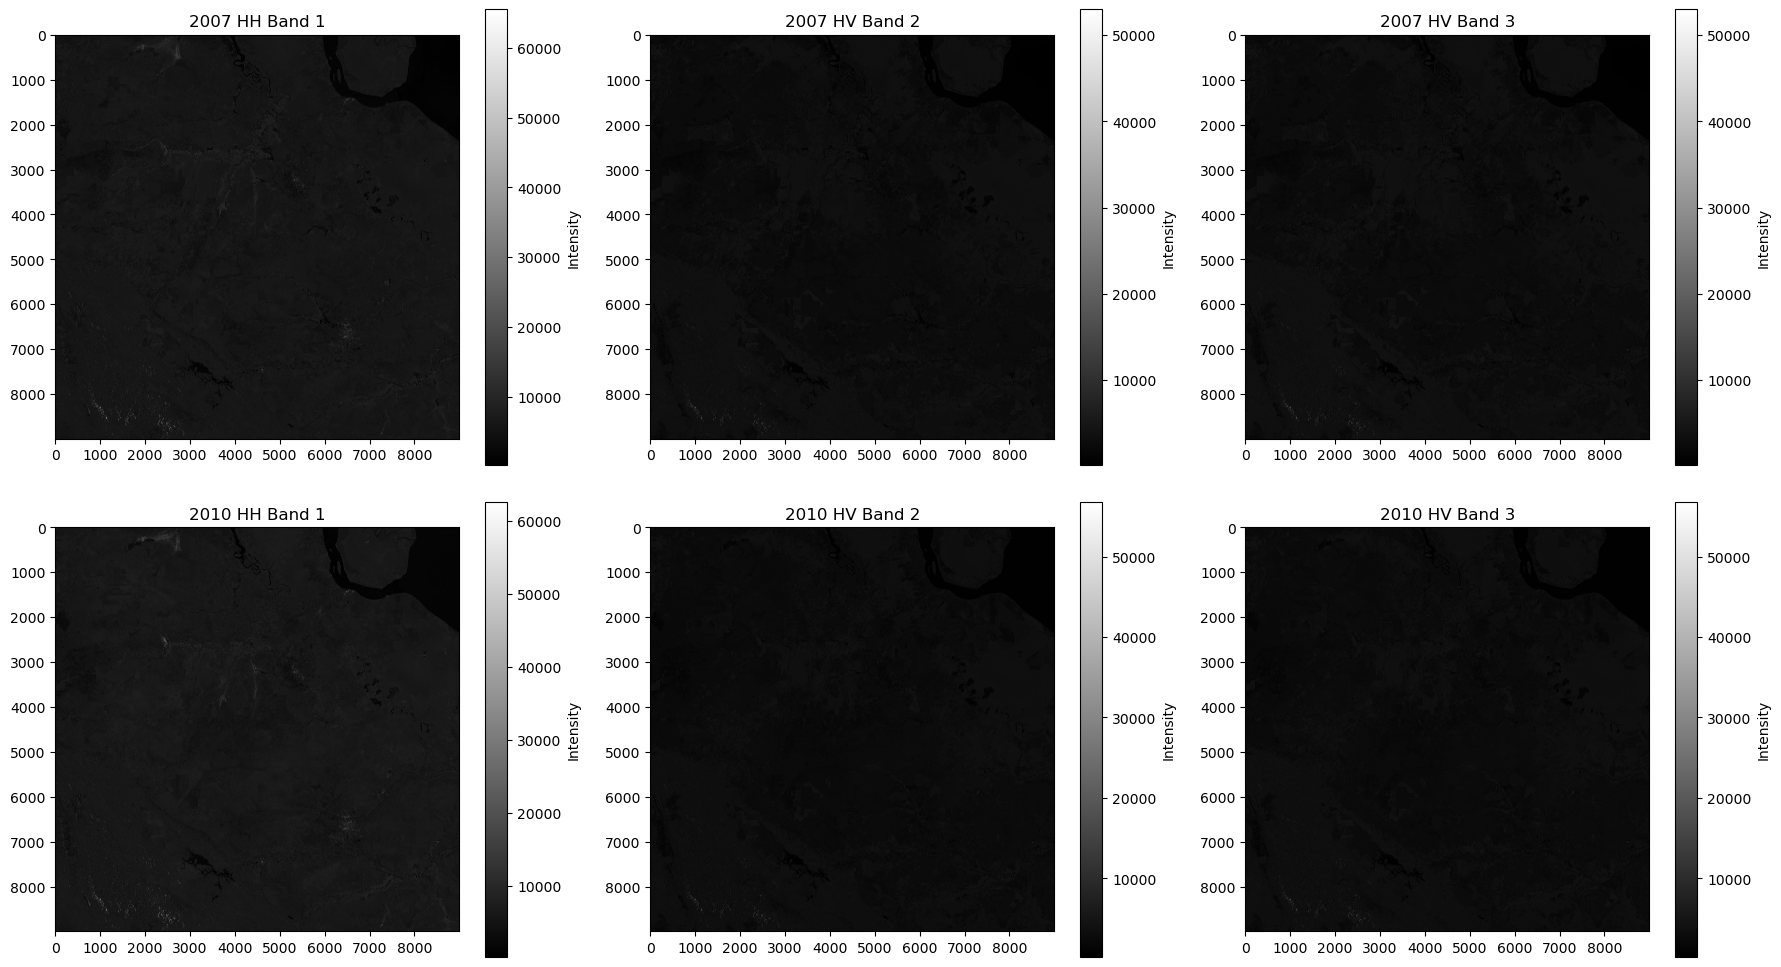

In [9]:
# Create a 2x3 plot layout
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plot 2007 bands
ima1 = axs[0, 0].imshow(hh_b1_2007, cmap='gray')
axs[0, 0].set_title("2007 HH Band 1")
fig.colorbar(ima1, ax=axs[0, 0], orientation='vertical', label='Intensity')

ima2 = axs[0, 1].imshow(hv_b2_2007, cmap='gray')
axs[0, 1].set_title("2007 HV Band 2")
fig.colorbar(ima2, ax=axs[0, 1], orientation='vertical', label='Intensity')

ima3 = axs[0, 2].imshow(hv_b3_2007, cmap='gray')
axs[0, 2].set_title("2007 HV Band 3")
fig.colorbar(ima3, ax=axs[0, 2], orientation='vertical', label='Intensity')

# Plot 2010 bands
ima4 = axs[1, 0].imshow(hh_b1_2010, cmap='gray')
axs[1, 0].set_title("2010 HH Band 1")
fig.colorbar(ima4, ax=axs[1, 0], orientation='vertical', label='Intensity')

ima5 = axs[1, 1].imshow(hv_b2_2010, cmap='gray')
axs[1, 1].set_title("2010 HV Band 2")
fig.colorbar(ima5, ax=axs[1, 1], orientation='vertical', label='Intensity')

ima6 = axs[1, 2].imshow(hv_b3_2010, cmap='gray')
axs[1, 2].set_title("2010 HV Band 3")
fig.colorbar(ima6, ax=axs[1, 2], orientation='vertical', label='Intensity')

# Adjust layout and display
plt.tight_layout()
plt.show()

Create a color composite (R: HH, G: HV, B: HH)

In [11]:
# Stack images into RGB channels: HH_t1 as Red, HV_t2 as Green, HH_t3 as Blue
rgb_composite_2007 = np.dstack((hh_b1_2007, hv_b2_2007, hv_b3_2007))
rgb_composite_2010 = np.dstack((hh_b1_2010, hv_b2_2010, hv_b3_2010))

Display the composite image

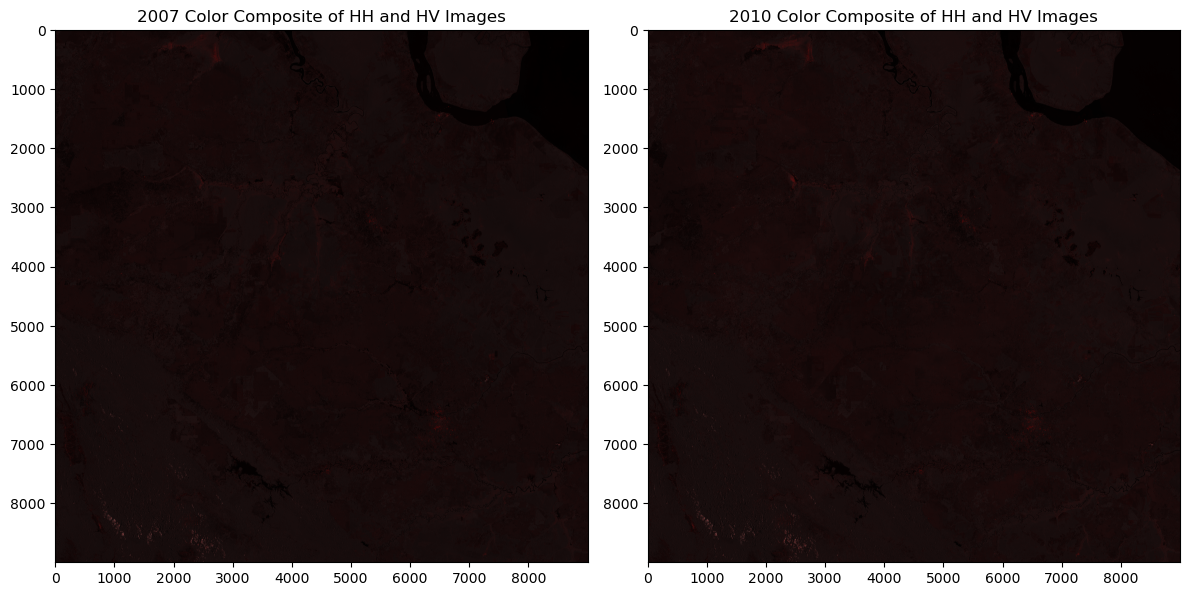

In [12]:
# Normalize 2007 composite
rgb_composite_2007 = (rgb_composite_2007 - np.min(rgb_composite_2007)) / (np.max(rgb_composite_2007) - np.min(rgb_composite_2007))

# Normalize 2010 composite
rgb_composite_2010 = (rgb_composite_2010 - np.min(rgb_composite_2010)) / (np.max(rgb_composite_2010) - np.min(rgb_composite_2010))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot 2007 composite
im1 = ax1.imshow(rgb_composite_2007)
ax1.set_title("2007 Color Composite of HH and HV Images")
# Plot 2010 composite
im2 = ax2.imshow(rgb_composite_2010)
ax2.set_title("2010 Color Composite of HH and HV Images")

plt.tight_layout()
plt.show()

For enhancing the composite image for better visualization, we will apply constract stretching to adjust the range of intensity values.

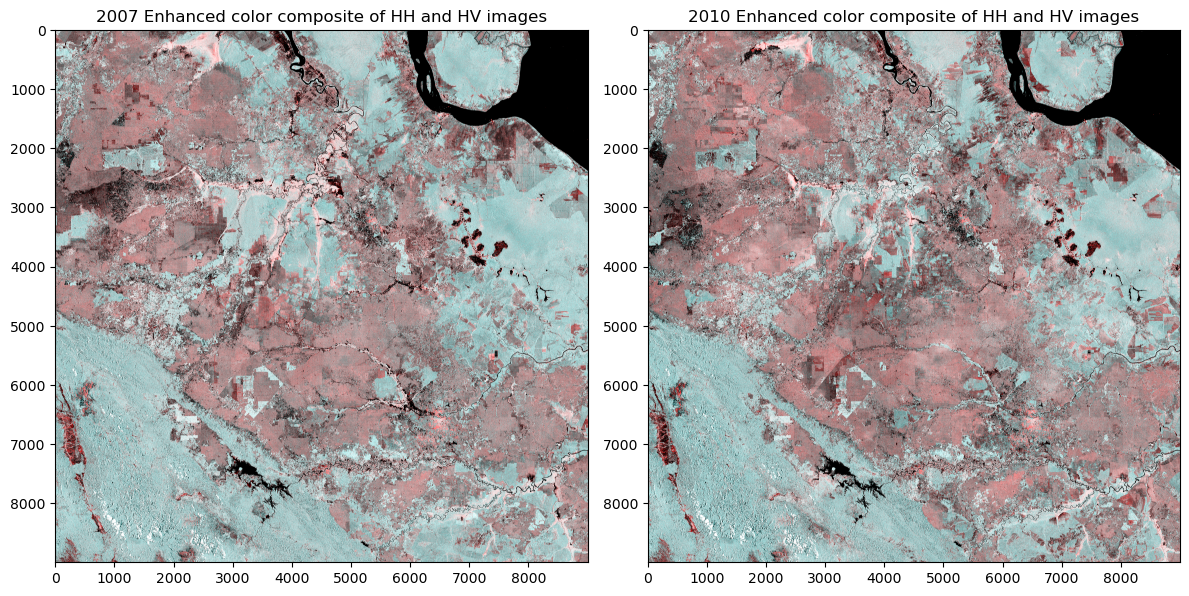

In [13]:
# Function to enhance the RGB composite
def enhance_composite(rgb_composite, gamma=0.5):
    # Apply gamma correction
    rgb_composite_gamma = np.zeros_like(rgb_composite)
    for i in range(3): 
        rgb_composite_gamma[:, :, i] = np.power(rgb_composite[:, :, i], gamma)

    # Calculate percentiles for contrast stretching
    p2_r, p98_r = np.percentile(rgb_composite_gamma[:, :, 0], (5, 95))
    p2_g, p98_g = np.percentile(rgb_composite_gamma[:, :, 1], (5, 95))
    p2_b, p98_b = np.percentile(rgb_composite_gamma[:, :, 2], (5, 95))

    # Perform contrast stretching
    r_stretched = np.clip((rgb_composite_gamma[:, :, 0] - p2_r) / (p98_r - p2_r), 0, 1)
    g_stretched = np.clip((rgb_composite_gamma[:, :, 1] - p2_g) / (p98_g - p2_g), 0, 1)
    b_stretched = np.clip((rgb_composite_gamma[:, :, 2] - p2_b) / (p98_b - p2_b), 0, 1)

    # Combine stretched channels back into an RGB image
    return np.dstack((r_stretched, g_stretched, b_stretched))

# Enhance both 2007 and 2010 composites
rgb_composite_enhanced_2007 = enhance_composite(rgb_composite_2007)
rgb_composite_enhanced_2010 = enhance_composite(rgb_composite_2010)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# Plot 2007 enhanced composite
im1 = ax1.imshow(rgb_composite_enhanced_2007)
ax1.set_title("2007 Enhanced color composite of HH and HV images")
# Plot 2010 enhanced composite
im2 = ax2.imshow(rgb_composite_enhanced_2010)
ax2.set_title("2010 Enhanced color composite of HH and HV images")

plt.tight_layout()
plt.show()

Creating a **composite image** from the HH and HV bands of the 2007 and 2010 from ALOS-2 image are valuable for enhancing the analysis of land use and environmental changes over time.


**Enhanced Visual Differentiation:**

A composite image combining the HH and HV polarizations provides a clearer picture of surface structures and vegetation density.
By assigning each band to a specific color channel, you can distinguish between different types of land cover and land use changes, such as forest cover, water bodies, and human development.

The composite results, it is helpful to analyze how each component contributes to the overall classification.
The composite image merges multiple bands (e.g., HH and HV) over different years, allowing a layered analysis of surface backscatter changes.

To save the RGB composite as an image file for future use, we can use rasterio to save it as a .tif file to ensure compatibility with geospatial data.

In [23]:
import rasterio
from rasterio.transform import from_origin

transform = from_origin(0, 0, 25, 25)  

# Save 2007 composite
with rasterio.open(
    '2007_rgb_composite.tif', 'w',
    driver='GTiff', height=rgb_composite_enhanced_2007.shape[0], width=rgb_composite_enhanced_2007.shape[1],
    count=3, dtype=rgb_composite_enhanced_2007.dtype, transform=transform
) as dst:
    dst.write(rgb_composite_2007[:, :, 0], 1)  # Red channel
    dst.write(rgb_composite_2007[:, :, 1], 2)  # Green channel
    dst.write(rgb_composite_2007[:, :, 2], 3)  # Blue channel

# Save 2010 composite
with rasterio.open(
    '2010_rgb_composite.tif', 'w',
    driver='GTiff', height=rgb_composite_2010.shape[0], width=rgb_composite_enhanced_2010.shape[1],
    count=3, dtype=rgb_composite_2010.dtype, transform=transform
) as dst:
    dst.write(rgb_composite_enhanced_2010[:, :, 0], 1)  # Red channel
    dst.write(rgb_composite_enhanced_2010[:, :, 1], 2)  # Green channel
    dst.write(rgb_composite_enhanced_2010[:, :, 2], 3)  # Blue channel

####  b. Explain interpretation with the typical land cover examples

ALOS-2 color composites represent various land cover types. For example, water bodies, vegetation, oil palm plantations, urban areas, and bare land each present distinct colors based on their radar reflection properties. The figure below shows the details of how land cover is interpreted using the composite image.

![interpretation_alos2rgb.png](interpretation_alos2rgb.png)

![interpretation_hhhv.png](interpretation_hhhv.png)

![interpretation_ge.png](interpretation_ge.png)

#### c. Highlight identifiable changes in the color composites and compare them with high-resolution images on Google Earth

Here, we highlight the identifiable changes observed in the ALOS-2 color composites over time. As a result, we can analyze changes in land cover, such as deforestation due to the expansion of oil palm plantations.

| Vegetation To Oil Palm Plantations            | 2007                                  | 2010                | 2015                   | 2020 |
|-------------------|----------------------------------|-------------------------------|---------------------------------|-----------------------------------------|
|**ALOS-2 Composite image (R:HH G:HV B:HH)**        | ![07rgb.png](07rgb.png) | ![10rgb.png](10rgb.png) |![15rgb.png](15rgb.png) | ![20rgb.png](20rgb.png) |
| **High-resolution images on Google Earth**       | ![07gg.png](07gg.png)      | ![10gg.png](10gg.png) | ![15gg.png](15gg.png) | ![20gg.png](20gg.png) |

**Detect areas of changes caused by oil palm plantations**
- **In 2007**, large areas of forest in Indonesia were still intact. These dense tropical forests are characterized by high biodiversity, rich canopy cover.

- **In 2010**, Clearing and Transition: land clearing for oil palm plantations intensified, the activities show up in satellite imagery as reductions in vegetation cover.
This phase is marked by temporary bare land or young oil palm plantations.
- **In 2015**, This year saw a marked expansion of oil palm plantations across Indonesia. Young oil palms, planted in rows, covered large portions of previously forested areas.
- **In 2020**, Plantation Maturity and Further Expansion. Oil palm plants areas are increasingly, which are planted in structured rows. In ALOS-2 image, oil palm areas show a more uniform vegetation pattern.

## 9.2. Detect areas of changes caused by oil palm plantations including comparisions with optical observations.
In this section, we will detect changes areas caused by the expansion of oil palm planations and compare these finding with optical observations. 

### Learning objectives
- Analyze mid-term changes (1-3 years) and short to long-term changes (10 years or more) caused by oil palm plantations.
- Calculate changes by determining differences between the two years using change vector analysis between HH and HV method.
- Validate the changes for sampled locations on historical imagereis of Google Earth.

### 9.2.1. Analyse changes cased by oil palm plantations.
- We examine changes in land cover due to oil palm expansion, focusing on both mid-term and long-term changes, and compare these with optical imagery such as Google Earth.
- We will use the composite images from 2007 and 2010 to analyze mid-term changes, and the composite images from 2010 and 2020 to analyze long-term changes.


.

### Mid-term changes, such as 3 years, from 2007 to 2010.

![st_term_0710_rgb.png](st_term_0710_rgb.png)

 ### Long-term changes, such as 10 years, from 2010 to 2020.
![lt_term1020_rgb.png](lt_term1020_rgb.png)


1. **Short-Mid-Term Changes (1–3 Years)**
In the initial stages, the conversion from forest to oil palm plantation involves dramatic land-use changes, including clearing natural forest cover, preparing the land, and establishing new crops
2. **Long-Term Changes (10 Years)** Over a decade, the area transforms into a mature oil palm plantation.
.

### 9.2.2. Change detection by calculating differences between the two years

Change Vector Analysis (CVA) uses two spectral channels to map both the: 1) magnitude of change and, 2) the direction of change between the two (spectral) input images for each date.

**Change vector analysis**


In n-dimensional spectral space, determine length and direction of vector between year 1 and year 2. 

In this section, we will use the composite images from 2007 and 2010 to analyze changes using the change vector analysis method, as preferred in this paper: [A CHANGE VECTOR ANALYSIS TECHNIQUE TO MONITOR LAND USE/LAND 
COVER IN SW BRAZILIAN AMAZON: ACRE STAT](https://www.isprs.org/proceedings/xxxiv/part1/paper/00014.pdf).]

In [14]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# hh_2007_path = "Alos_2_2007_HH.tif" 
# hh_2010_path = "Alos_2_2007_HV.tif"
# hv_2007_path = "Alos_2_2010_HH.tif"
# hv_2010_path = "Alos_2_2010_HV.tif"

After obtaining the data, apply radiometric calibration factors to convert digital numbers (DN) to backscatter values (dB) using the below formular:

- σ0 = 10*log10(DN2) - 83.0 dB [ALOS-2 Calibration Result of ALOS-2](https://www.eorc.jaxa.jp/ALOS/en/alos-2/a2_calval_e.htm)

NOTE: Radiometric calibration is essential for translating ALOS-2 SAR data into meaningful backscatter values that reflect the Earth's surface accurately. This process corrects for sensor biases, making the data comparable across different sensors and acquisition times. Proper calibration enables detailed analyses, such as environmental monitoring, land use classification, and disaster management, by ensuring consistent, physically accurate measurements.

In [7]:
# def calibrate_ima(image):
#     return 10 * np.log10(image ** 2) - 83.0

In [3]:
# with rasterio.open(hh_2007_path) as src1, rasterio.open(hh_2010_path) as src2, \
#      rasterio.open(hv_2007_path) as src3, rasterio.open(hv_2010_path) as src4:
    
#     # Read the original images
#     hh_2007_raw = src1.read(1).astype('float32')
#     hh_2010_raw = src2.read(1).astype('float32')
#     hv_2007_raw = src3.read(1).astype('float32')
#     hv_2010_raw = src4.read(1).astype('float32')

#     # Calibrate the images
#     hh_2007_cal = 10 * np.log10(hh_2007_raw ** 2) - 83.0
#     hh_2010_cal = 10 * np.log10(hh_2010_raw ** 2) - 83.0
#     hv_2007_cal = 10 * np.log10(hv_2007_raw ** 2) - 83.0
#     hv_2010_cal = 10 * np.log10(hv_2010_raw ** 2) - 83.0

In [15]:
# fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# axs[0, 0].imshow(hh_2007_raw, cmap='gray')
# axs[0, 0].set_title('Year 2007 HH (Original)')
# fig.colorbar(axs[0, 0].imshow(hh_2007_raw, cmap='gray'), ax=axs[0, 0], orientation='vertical', label='Intensity')
# axs[0, 1].imshow(hh_2007_cal, cmap='gray')
# axs[0, 1].set_title('Year 2007 HH (Calibrated)')
# fig.colorbar(axs[0, 1].imshow(hh_2007_cal, cmap='gray'), ax=axs[0, 1], orientation='vertical', label='Intensity')

# axs[1, 0].imshow(hh_2010_raw, cmap='gray')
# axs[1, 0].set_title('Year 2010 HH (Original)')
# fig.colorbar(axs[1, 0].imshow(hh_2010_raw, cmap='gray'), ax=axs[1, 0], orientation='vertical', label='Intensity')
# axs[1, 1].imshow(hh_2010_cal, cmap='gray')
# axs[1, 1].set_title('Year 2010 HH (Calibrated)')
# fig.colorbar(axs[1, 1].imshow(hh_2010_cal, cmap='gray'), ax=axs[1, 1], orientation='vertical', label='Intensity')

# axs[2, 0].imshow(hv_2007_raw, cmap='gray')
# axs[2, 0].set_title('Year 2007 HV (Original)')
# fig.colorbar(axs[2, 0].imshow(hv_2007_raw, cmap='gray'), ax=axs[2, 0], orientation='vertical', label='Intensity')
# axs[2, 1].imshow(hv_2007_cal, cmap='gray')
# axs[2, 1].set_title('Year 2007 HV (Calibrated)')
# fig.colorbar(axs[2, 1].imshow(hv_2007_cal, cmap='gray'), ax=axs[2, 1], orientation='vertical', label='Intensity')

# axs[3, 0].imshow(hv_2010_raw, cmap='gray')
# axs[3, 0].set_title('Year 2010 HV (Original)')
# fig.colorbar(axs[3, 0].imshow(hv_2010_raw, cmap='gray'), ax=axs[3, 0], orientation='vertical', label='Intensity')
# axs[3, 1].imshow(hv_2010_cal, cmap='gray')
# axs[3, 1].set_title('Year 2010 HV (Calibrated)')
# fig.colorbar(axs[3, 1].imshow(hv_2010_cal, cmap='gray'), ax=axs[3, 1], orientation='vertical', label='Intensity')

# plt.tight_layout()
# plt.show()

To save time during the data processing stage, we have pre-calibrated the data using the formula provided above.

Open the saved calibrated images for calculating magnitude and angle of change

In [16]:
hh_2007_path = "2007HHcalibrated5_image.tif" 
hh_2010_path = "2010HHcalibrated5_image.tif"
hv_2007_path = "2007HVcalibrated5_image.tif"
hv_2010_path = "2010HVcalibrated5_image.tif"

In [18]:
with rasterio.open(hh_2007_path) as src1, rasterio.open(hh_2010_path) as src2, \
     rasterio.open(hv_2007_path) as src3, rasterio.open(hv_2010_path) as src4:
    
    hh_2007_cal = src1.read(1).astype('float32')
    hh_2010_cal = src2.read(1).astype('float32')
    hv_2007_cal = src3.read(1).astype('float32')
    hv_2010_cal = src4.read(1).astype('float32')

In [20]:
delta_bandhv_cal = hv_2010_cal - hv_2007_cal
delta_bandhh_cal = hh_2010_cal - hh_2007_cal

magnitude = np.sqrt(delta_bandhv_cal**2 + delta_bandhh_cal**2)
angle = np.arctan2(delta_bandhv_cal, delta_bandhh_cal) #Radians: When using trigonometric functions like arctan or atan2, the default output is often in radians, where 00 to 2𝜋2π radians (approximately 00 to 6.286.28) covers the full circular range of angles.

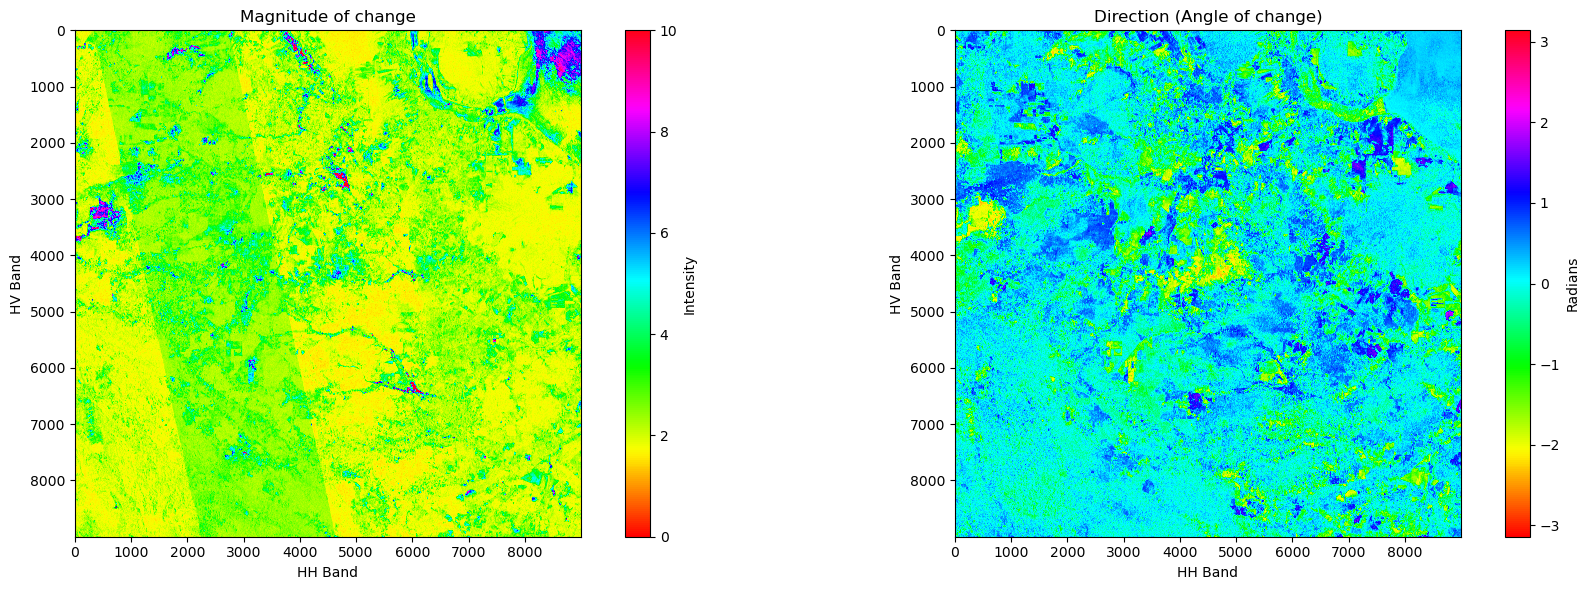

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

norm_magnitude = mcolors.Normalize(vmin=0, vmax=10)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

im1 = axs[0].imshow(magnitude, cmap='hsv', norm=norm_magnitude)
axs[0].set_title("Magnitude of change")
axs[0].set_xlabel("HH Band")
axs[0].set_ylabel("HV Band")
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar1.set_label("Intensity")

im2 = axs[1].imshow(angle, cmap='hsv')
axs[1].set_title("Direction (Angle of change)")
axs[1].set_xlabel("HH Band")
axs[1].set_ylabel("HV Band")
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar2.set_label("Radians")

plt.tight_layout()
plt.show()

## Validate the changes for sampled locations on historical imagereis of Google Earth
CVA provides both the magnitude and direction of change, offering more detailed information about the type of change. For example, magnitude indicates the extent of change, while direction indicates types of changes (e.g., vegetation loss or growth)..

**Change vector analysis**

![CVA_des.png](CVA_des.png)

![cva_1.png](cva_1.png)
![cva_2.png](cva_2.png)
![cva_3.png](cva_3.png)

## 9.3. Classification of detected changes

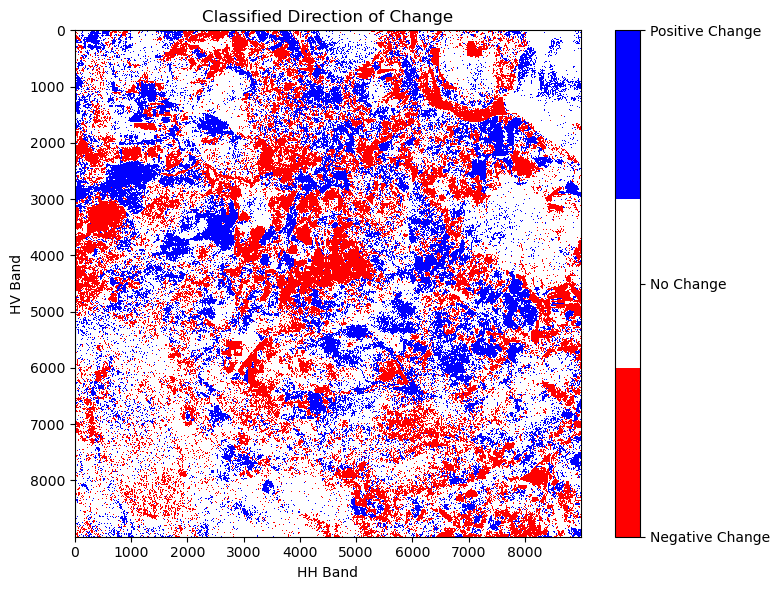

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Assuming `angle_class` is an array with values -1, 0, and 1 representing each change class
# Create a discrete color map with three colors: one for each class
cmap = ListedColormap(['red', 'white', 'blue'])  # Example: blue = Negative, white = No Change, red = Positive

# Display the classified map of change direction
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(angle, cmap=cmap, vmin=-1, vmax=1)

# Set title and labels
ax.set_title("Classified Direction of Change")
ax.set_xlabel("HH Band")
ax.set_ylabel("HV Band")

# Add a color bar with labels for each class
cbar = fig.colorbar(im, ax=ax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['Negative Change', 'No Change', 'Positive Change'])

plt.tight_layout()
plt.show()


The **Classified Direction of Change map** visualizes the type of detected changes between two years from  HH and HV bands, showing directional differences in the change vector analysis (CVA).

**Positive Change (1):** 
Represented in  **blue in the map**, positive change marks areas where the angle of the change vector suggests an "increase" in backscatter intensity or structural complexity.Positive change can indicate vegetation regrowth, increased biomass, or transitions to surfaces that reflect more signal in HH or HV bands.For example, in land cover studies, an increase might be associated with forest recovery or the growth of other dense vegetation.

**No Change (0):**

This class, commonly shown as a  **white**, indicates areas where  no directional change occurred between the two SAR bands over the observed period. In "no change" areas suggests that the properties affecting backscatter remained relatively stable.


**Negative Change (-1):**

This class, shown in **red** color, represents areas where the change vector's angle indicates a "negative change." A negative change mean a reduction in radar backscatter intensity from HH to HV bands. This reduction might be associated with changes in surface properties and vegetation loss. For example, a reduction represent deforestation, land clearing, or conversion of vegetation to bareland.